In [1]:
import pandas as pd
import luxpy as lx # package for color science calculations 
# print('Luxpy version: ',lx.__VERSION__)
# version: v1.9.6
import numpy as np # fundamental package for scientific computing 
import matplotlib.pyplot as plt # package for plotting
import copy

251


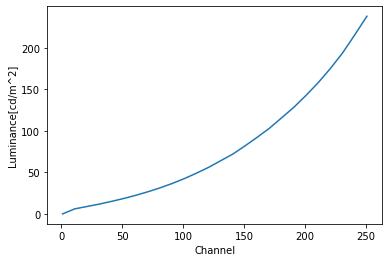

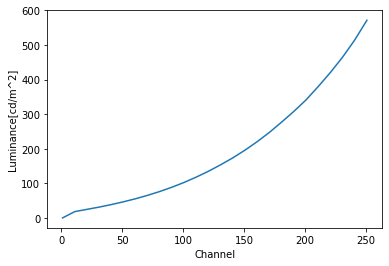

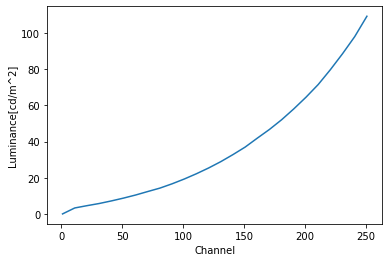

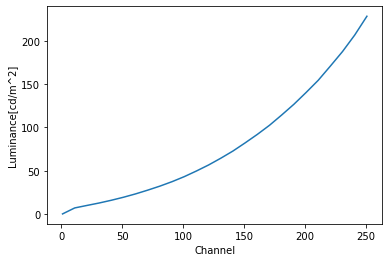

In [2]:
# get data
spdData = pd.read_csv('./data/spectrums.txt', sep=' |:', header=None, engine='python')
spdData.columns = ['Light','Channel','Value']
spdData['Luminance'] = spdData.apply(lambda x: float(lx.spd_to_power(eval(x['Value']), ptype='pu')), axis=1)
# spd_to_power(): spectral radiant power [W/nm] to luminance [cd/m^2]

for i in [1,2,3,5]:
    channel = []
    luminance = []
    for j in range(1,256,10):
        channel.append(j)
        luminance.append(spdData['Luminance'][spdData['Light']==i][spdData['Channel']==j])
    plt.figure()
    plt.plot(channel,luminance)
    plt.xlabel('Channel')
    plt.ylabel('Luminance[cd/m^2]')
    plt.show
    
#curvefitting
def ChannelValue(l:int, perc:float): #l:light(R-1,G-2,B-3,A-5), perc:percentage of the channel
    if l == 1:
        para = np.array([3.79101032e-03, -7.71247848e-02,9.17950337e+00])
        func = np.poly1d(para)
    elif l == 2:
        para = np.array([9.14054992e-03, -2.08932099e-01,2.49404590e+01])
        func = np.poly1d(para)
    elif l == 3:
        para = np.array([1.76936023e-03, -4.70784519e-02,4.83069050e+00])
        func = np.poly1d(para)
    elif l == 5:
        para = np.array([3.47076694e-03, -2.68425662e-02,8.62810845e+00])
        func = np.poly1d(para)
    
    return int([x for x in np.roots(func-perc*255) if x > 0][0])

print(ChannelValue(1,0.9))

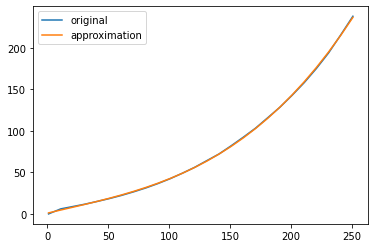

In [3]:
# Approximation
def getApproximation(x, y, n):
    apx = np.polyfit(x, y, n)
    y_apx = np.poly1d(apx)(x)
    return (x, y_apx)

channel = 1
x = range(1,256,10)
y = spdData['Luminance'][spdData['Light']==channel]
x, y_apx = getApproximation(x, y, 3)

plt.plot(x, y, label='original')
plt.plot(x, y_apx, label='approximation')
plt.legend()
plt.show()

In [4]:
#print(spdData['Value'].iloc[0])
#p = np.array(copy.copy(eval(spdData['Value'].iloc[0])))
#print(p.shape)
#lx.SPD(p).plot()

# for i in range(0, 25):
#     lx.SPD(np.array(eval(spdData['Value'].iloc[i]))).plot()
    
#lx.SPD(np.array(eval(spdData['Value'].iloc[77]))).plot() 

r_primary = np.array(copy.copy(eval(spdData['Value'].iloc[25])))
g_primary = np.array(copy.copy(eval(spdData['Value'].iloc[51])))
b_primary = np.array(copy.copy(eval(spdData['Value'].iloc[77])))

e_illuminant = lx._CIE_E
#print(e_illuminant)
#lx.SPD(lx._CIE_E).plot() 



xyzt = lx.spd_to_xyz(e_illuminant,relative=False,K=1) # K = 1 replaces the default 683 lm/W value with 1!
Yxyt = lx.xyz_to_Yxy(xyzt)

xyzr = lx.spd_to_xyz(r_primary,relative=False,K=1) # K = 1 replaces the default 683 lm/W value with 1!
Yxyr = lx.xyz_to_Yxy(xyzr)
xyzg = lx.spd_to_xyz(g_primary,relative=False,K=1) # K = 1 replaces the default 683 lm/W value with 1!
Yxyg = lx.xyz_to_Yxy(xyzg)
xyzb = lx.spd_to_xyz(b_primary,relative=False,K=1) # K = 1 replaces the default 683 lm/W value with 1!
Yxyb = lx.xyz_to_Yxy(xyzb)
print(xyzt, Yxyt)
#print(Yxyr[0])

#print(np.linalg.inv(Yxyr[0]))
#3-channel color mixing
Cp = np.array([xyzr[0], xyzg[0], xyzb[0]]).T
#print(Cp)
w = np.linalg.inv(Cp) @ xyzt.T
print(w)
print(w[0]*Cp.T[0] + w[1]*Cp.T[1] + w[2]*Cp.T[2])


[[1.0687e+02 1.0686e+02 1.0689e+02]] [[1.0686e+02 3.3331e-01 3.3329e-01]]
[[9.1122e+01]
 [8.2666e+01]
 [3.7253e+01]]
[1.0687e+02 1.0686e+02 1.0689e+02]


In [5]:
#N-color mixing

a_primary = np.array(copy.copy(eval(spdData['Value'].iloc[103])))

xyza = lx.spd_to_xyz(a_primary,relative=False,K=1) # K = 1 replaces the default 683 lm/W value with 1!
Yxya = lx.xyz_to_Yxy(xyza)

Cp = np.array([xyzr[0], xyzg[0], xyzb[0], xyza[0]]).T

w = Cp.T @ (np.linalg.inv(Cp@Cp.T)) @ xyzt.T
print(w)
print(w[0]*Cp.T[0] + w[1]*Cp.T[1] + w[2]*Cp.T[2] + w[3]*Cp.T[3])

[[6.4615e+01]
 [7.4409e+01]
 [3.7513e+01]
 [4.8139e+01]]
[1.0687e+02 1.0686e+02 1.0689e+02]


[[2.8759e-01]
 [3.3118e-01]
 [1.6696e-01]
 [2.1426e-01]]
[136, 147, 97, 109]


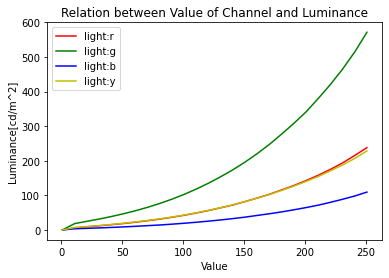

In [37]:
import pandas as pd
import luxpy as lx # package for color science calculations 
# print('Luxpy version: ',lx.__VERSION__)
# version: v1.9.6
import numpy as np # fundamental package for scientific computing 
import matplotlib.pyplot as plt # package for plotting
from scipy import interpolate



spdData = pd.read_csv('./data/spectrums.txt', sep=' |:', header=None, engine='python')
spdData.columns = ['Light','Channel','Value']
spdData['Luminance'] = spdData.apply(lambda x: float(lx.spd_to_power(eval(x['Value']), ptype='pu')), axis=1)
# spd_to_power(): spectral radiant power [W/nm] to luminance [cd/m^2]

largestLum = []
for i in [1,2,3,5]:
    channel = []
    luminance = []
    col = np.where(i==1, 'r', np.where(i==2, 'g', np.where(i==3, 'b', 'y')))
    for j in range(1,256,10):
        channel.append(j)
        luminance.append(spdData['Luminance'][spdData['Light']==i][spdData['Channel']==j])
    
    largestLum.append(float(luminance[-1]))    # record the largest luminance of every channel
    plt.plot(channel,luminance,str(col),label='light:'+str(col))
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Luminance[cd/m^2]')
    plt.title('Relation between Value of Channel and Luminance')
    plt.show    #plot
    
    x = np.array(channel)
    y = np.array(luminance)    
    exec('func'+str(i)+'=interpolate.UnivariateSpline(y,x,s=0)') # interpolation: pass all the points

largestLum.insert(3,None) #To easily process in function of ChannelValue


def ChannelValue(l:int, perc:float): 
    # input: l:light(R-1,G-2,B-3,A-5), perc:the percentage of the maximum luminance of the channel
    # output: the channel value(1~251)
    return int(eval('func'+str(l)+'('+str(perc*largestLum[l-1])+')'))   

#get luminance by normalize
w_normalized = w / w.sum()
print(w_normalized)

digit = []
digit.append(ChannelValue(1, w_normalized[0]))
digit.append(ChannelValue(2, w_normalized[1]))
digit.append(ChannelValue(3, w_normalized[2]))
digit.append(ChannelValue(5, w_normalized[3]))
print(digit)
